<a href="https://colab.research.google.com/github/kliang696/Bank-Churn-Analysis/blob/main/bank_churn_analysis_1215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis and Data Cleaning

### Part 1 Data Exploration

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv("/content/drive/MyDrive/BankChurnAnalysis/BankChurners.csv")

In [82]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### 1.1 What’s the shape of this dataset? How many features do we have in this dataset? Is there any null values?

In [83]:
df.shape

(10127, 23)

In [84]:
# Create a Boolean mask of null values
null_mask = df.isnull()

# Sum the mask to find the total number of null values
num_nulls = null_mask.sum()

print(num_nulls)

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In this dataset,it involves 23 features. we have 23 columns with 10127 rows and based on the talbe above, we don't have any null values.




#### 1.2 Is there any data that we need to remove in this dataset?

In [85]:
df = df.drop(df.columns[[-1, -2]],axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In this dataset, the last two columns are not needed, so we remove them to keep data organized and clean

#### 1.4 If this dataset is imbalanced?

In [86]:
target = df["Attrition_Flag"] # Target variable

In [87]:
target.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

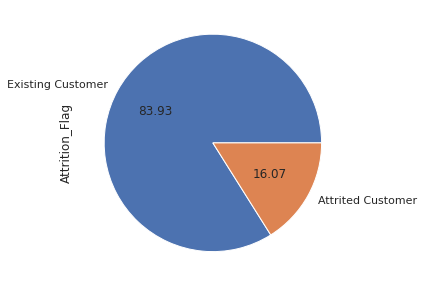

In [88]:
target.value_counts().plot.pie(autopct='%.2f',figsize=(6, 5))

*   As we can see, this dataset is not balanced at all where lable 0 make up the majority of the dataset and leaving lable 1 fewer examples. 

*   It will casue problems becasue a biased model will be built based on imbalanced data which is accurate to predict the majority class but fails to predict the minority class.

* This problem will be resolved using random over-sampling technique.





### Part 2 Data Exploration for categorical data
#### CountPlot for numerical data

#### 2.1 How many unique values are there, and what are the frequencies of these values? Shall we convert any of the categorical variables to numerical to get better results? 

In [89]:
df["Attrition_Flag"].replace(['Existing Customer', 'Attrited Customer'],[0, 1], inplace=True)
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [90]:
df["Gender"].replace(['F', 'M'],[0, 1], inplace=True)
df["Gender"].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [91]:
df['Education_Level'].replace(['Uneducated', 'High School','College','Graduate','Post-Graduate','Doctorate','Unknown'],[0, 1, 2, 3, 4,5,np.nan], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    3128
1.0    2013
NaN    1519
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [92]:
df['Education_Level'].replace([np.nan],[3], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    4647
1.0    2013
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [93]:
df["Income_Category"].replace(['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],[0, 1, 2, 3, 4,np.nan], inplace=True)
df['Income_Category'].value_counts(dropna=False)

0.0    3561
1.0    1790
3.0    1535
2.0    1402
NaN    1112
4.0     727
Name: Income_Category, dtype: int64

In [94]:
df["Income_Category"].replace([np.nan],[0], inplace=True)
df['Income_Category'].value_counts()

0.0    4673
1.0    1790
3.0    1535
2.0    1402
4.0     727
Name: Income_Category, dtype: int64

In [95]:
df["Card_Category"].replace(['Blue', 'Silver', 'Gold', 'Platinum'],[0, 1, 2, 3], inplace=True)
df["Card_Category"].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

In this section, we convert all the categorical to numerical values.

In [96]:
df_cat = df[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

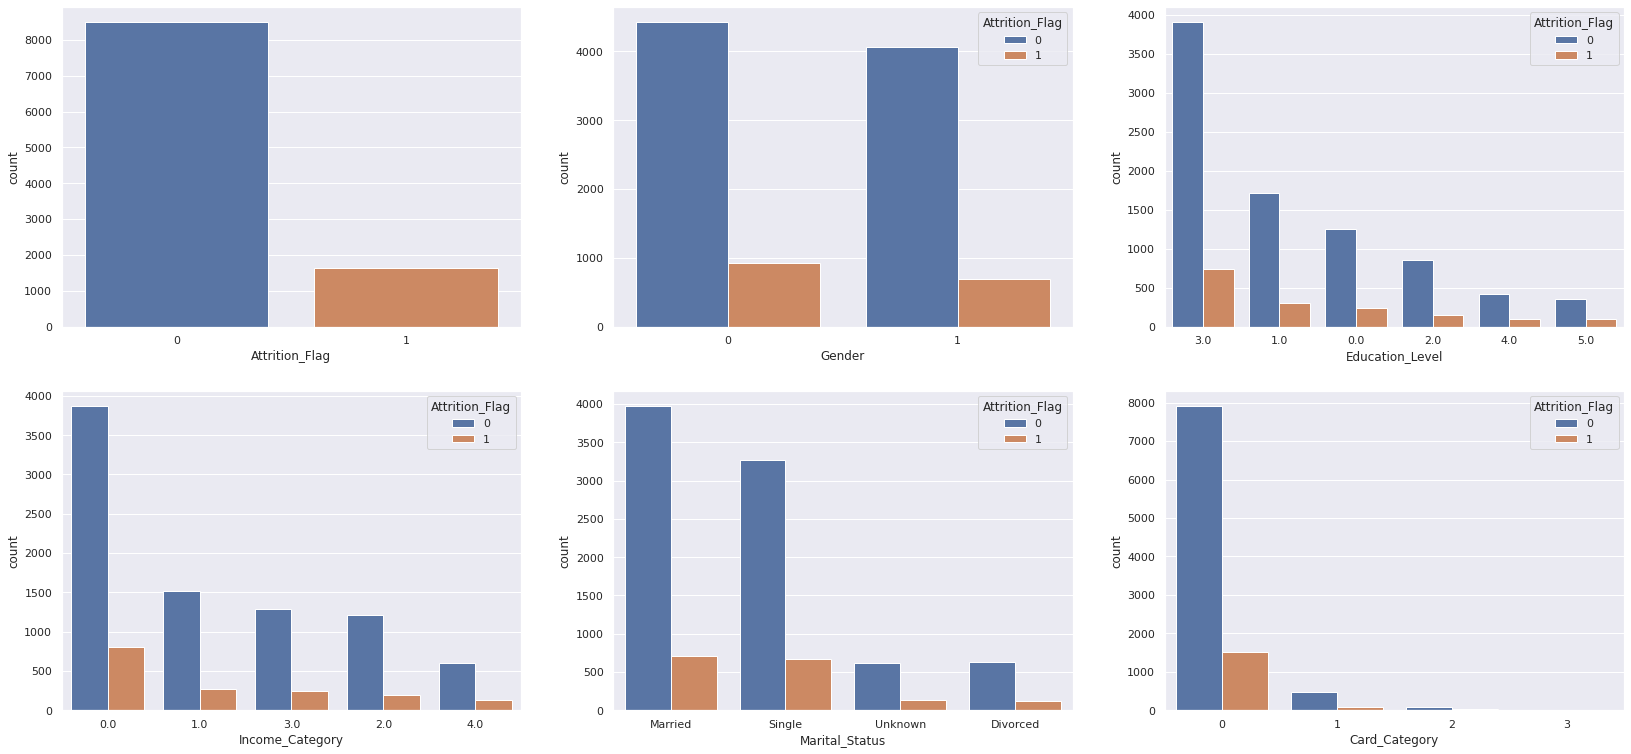

In [97]:
plt.figure(figsize=(28, 20))

plt.subplot(3,3,1)
sns.countplot(x=df["Attrition_Flag"],data=df)
plt.subplot(3,3,2)
sns.countplot(x=df["Gender"],hue="Attrition_Flag",order = df['Gender'].value_counts().index,data=df)
plt.subplot(3,3,3)
ax2 = sns.countplot(x=df["Education_Level"],hue="Attrition_Flag",order = df['Education_Level'].value_counts().index, data=df)
plt.subplot(3,3,4)
ax3 = sns.countplot(x=df["Income_Category"],hue="Attrition_Flag",order = df['Income_Category'].value_counts().index,data=df)
plt.subplot(3,3,5)
ax4 = sns.countplot(x=df["Marital_Status"],hue="Attrition_Flag",order = df['Marital_Status'].value_counts().index,data=df)
plt.subplot(3,3,6)
ax5 = sns.countplot(x=df["Card_Category"],hue="Attrition_Flag",order = df['Card_Category'].value_counts().index,data=df)




### Part 3 Data Exploration for numerical data
#### Plot histogram of numerical data

In [98]:
df_num = df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

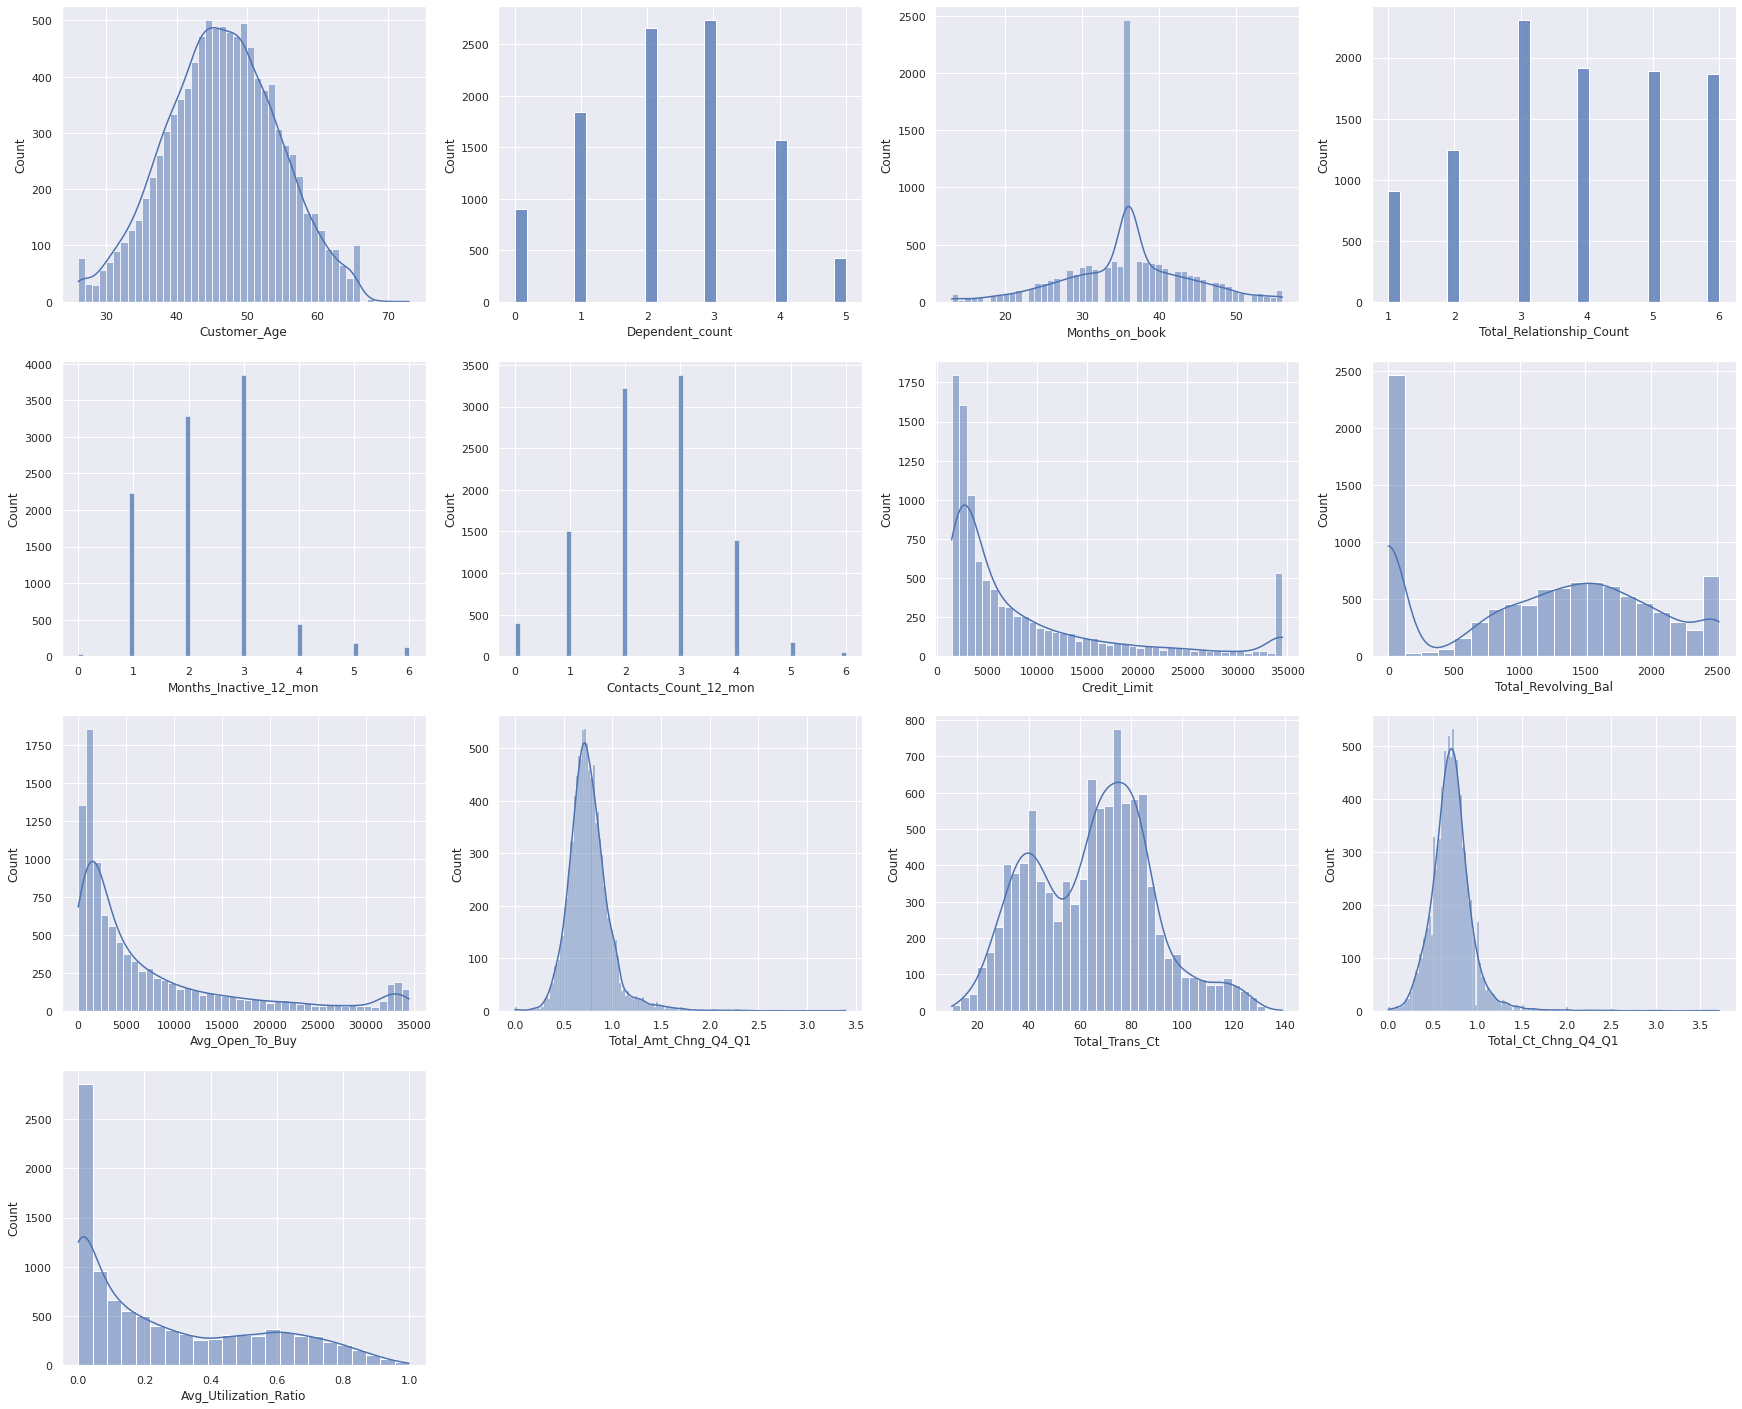

In [99]:
plt.figure(figsize=(30, 25))

plt.subplot(4,4,1)
sns.histplot(x=df_num["Customer_Age"],kde=True,data=df)
plt.subplot(4,4,2)
sns.histplot(x=df_num["Dependent_count"],kde=False,data=df)
plt.subplot(4,4,3)
sns.histplot(x=df_num["Months_on_book"],kde=True,data=df)
plt.subplot(4,4,4)
sns.histplot(x=df_num["Total_Relationship_Count"],kde=False,data=df)
plt.subplot(4,4,5)
sns.histplot(x=df_num["Months_Inactive_12_mon"],kde=False,data=df)
plt.subplot(4,4,6)
sns.histplot(x=df_num["Contacts_Count_12_mon"],kde=False,data=df)
plt.subplot(4,4,7)
sns.histplot(x=df_num["Credit_Limit"],kde=True,data=df)
plt.subplot(4,4,8)
sns.histplot(x=df_num["Total_Revolving_Bal"],kde=True,data=df)
plt.subplot(4,4,9)
sns.histplot(x=df_num["Avg_Open_To_Buy"],kde=True,data=df)
plt.subplot(4,4,10)
sns.histplot(x=df_num["Total_Amt_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,11)
sns.histplot(x=df_num["Total_Trans_Ct"],kde=True,data=df)
plt.subplot(4,4,12)
sns.histplot(x=df_num["Total_Ct_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,13)
sns.histplot(x=df_num["Avg_Utilization_Ratio"],kde=True,data=df)


In [100]:
summary = df.describe()
print(summary)

          CLIENTNUM  Attrition_Flag  Customer_Age        Gender  \
count  1.012700e+04    10127.000000  10127.000000  10127.000000   
mean   7.391776e+08        0.160660     46.325960      0.470919   
std    3.690378e+07        0.367235      8.016814      0.499178   
min    7.080821e+08        0.000000     26.000000      0.000000   
25%    7.130368e+08        0.000000     41.000000      0.000000   
50%    7.179264e+08        0.000000     46.000000      0.000000   
75%    7.731435e+08        0.000000     52.000000      1.000000   
max    8.283431e+08        1.000000     73.000000      1.000000   

       Dependent_count  Education_Level  Income_Category  Card_Category  \
count     10127.000000     10127.000000     10127.000000   10127.000000   
mean          2.346203         2.201935         1.195517       0.083638   
std           1.298908         1.344995         1.346933       0.333784   
min           0.000000         0.000000         0.000000       0.000000   
25%           1.00000

#### 3.1 Is there any outliers in any of these features in this dataset?

From the histograms above, we do not notice any outliers.

#### 3.2 Are there any correlations or associations between the data and label?

In [101]:
df_num["Flag"]=df['Attrition_Flag']

In [102]:
df_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


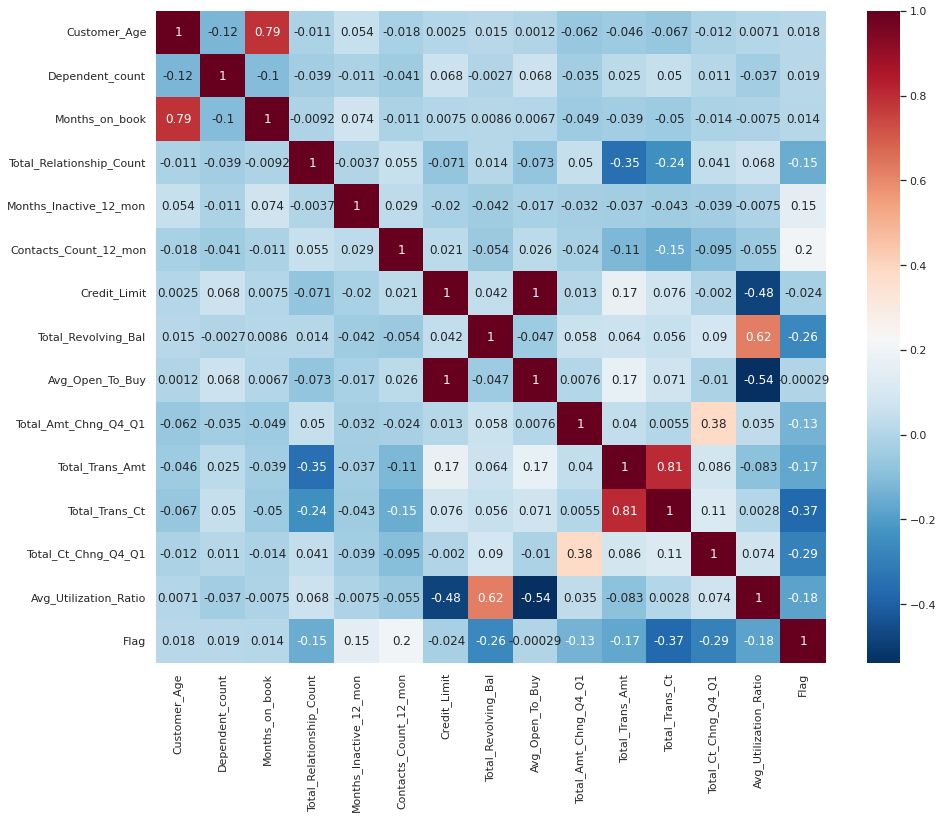

In [103]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df_num.corr(),annot=True,cmap='RdBu_r')

#### 3.3 What are the top 5 numerical features that most correlated on churn?

In [104]:
correlations = df.corr()

# Take the absolute value of the correlations
correlations = correlations.abs()

# Sort the correlations in descending order
correlations = correlations.sort_values(by="Attrition_Flag", ascending=False)

# Select the top 5 variables that are most correlated with the target
top_5 = correlations.head(6)

index_labels = top_5.index.tolist()

# Print the index labels of the top 5 variables
print("Top 5 correlated numericalvariables:")
for label in index_labels[1:]:
    print(label)



Top 5 correlated numericalvariables:
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Total_Revolving_Bal
Contacts_Count_12_mon
Avg_Utilization_Ratio


#Feature Enginearing

In [105]:
df["Recolving_Bal_Per_Relationship"]=df["Total_Revolving_Bal"]/df["Total_Relationship_Count"]

In [106]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship
0,768805383,0,45,1,3,1.0,Married,2.0,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,155.4
1,818770008,0,49,0,5,3.0,Single,0.0,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,144.0
2,713982108,0,51,1,3,3.0,Married,3.0,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0
3,769911858,0,40,0,4,1.0,Unknown,0.0,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,839.0
4,709106358,0,40,1,3,0.0,Married,2.0,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


In [107]:
df1 = pd.get_dummies(df, columns=['Marital_Status'],drop_first=True,prefix='Is')
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
0,768805383,0,45,1,3,1.0,2.0,0,39,5,...,11914.0,1.335,1144,42,1.625,0.061,155.4,1,0,0
1,818770008,0,49,0,5,3.0,0.0,0,44,6,...,7392.0,1.541,1291,33,3.714,0.105,144.0,0,1,0
2,713982108,0,51,1,3,3.0,3.0,0,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0.0,1,0,0
3,769911858,0,40,0,4,1.0,0.0,0,34,3,...,796.0,1.405,1171,20,2.333,0.760,839.0,0,0,1
4,709106358,0,40,1,3,0.0,2.0,0,21,5,...,4716.0,2.175,816,28,2.500,0.000,0.0,1,0,0


### What are the correlations after the feature engineering?

In [108]:
correlations_fe = df1.corr()

# Take the absolute value of the correlations
correlations_fe = correlations_fe.abs()

# Sort the correlations in descending order
correlations_fe = correlations_fe.sort_values(by="Attrition_Flag", ascending=False)

# Select the top 5 variables that are most correlated with the target
top_5 = correlations_fe.head(6)

index_labels = top_5.index.tolist()

# Print the index labels of the top 5 variables
print("Top 5 correlated numericalvariables:")
for label in index_labels[1:]:
    print(label)

Top 5 correlated numericalvariables:
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Total_Revolving_Bal
Contacts_Count_12_mon
Avg_Utilization_Ratio


# Model1: Logistic Regression 

## Import packages

In [109]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import shap


In [111]:
X = df1.iloc[:,2:] # Features
y = df1["Attrition_Flag"] # Target variable

## split data without random sampling

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

## Random Over Sampling

In [113]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) 
X_res_os, y_res_os = ros.fit_resample(X_train, y_train)
y_res_os.value_counts()

0    6777
1    6777
Name: Attrition_Flag, dtype: int64

In [114]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=223)

## Build model

In [115]:
logreg = LogisticRegression(max_iter=1000,solver="liblinear")
logreg.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000, solver='liblinear')

In [116]:
y_pred_logreg_org = logreg.predict(X_test)

y_pred_proba_logreg_org = logreg.predict_proba(X_test)[:, 1]


In [117]:
y_pred_logreg_test_os = logreg.predict(X_test_os)

y_pred_proba_logreg_test_os = logreg.predict_proba(X_test_os)[:, 1]

In [118]:
y_pred_logreg_train_os = logreg.predict(X_train_os)

y_pred_proba_logreg_train_os = logreg.predict_proba(X_train_os)[:, 1]

## Confusion Matrix

In [119]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test_os, y_pred_logreg_test_os)
cnf_matrix

array([[1143,  210],
       [ 206, 1152]])

## Classification Report

In [120]:
print(classification_report(y_test_os, y_pred_logreg_test_os))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1353
           1       0.85      0.85      0.85      1358

    accuracy                           0.85      2711
   macro avg       0.85      0.85      0.85      2711
weighted avg       0.85      0.85      0.85      2711



In [121]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg_org))

Accuracy: 0.8385982230997039


## Precision Recall Curve and Average Precision Score

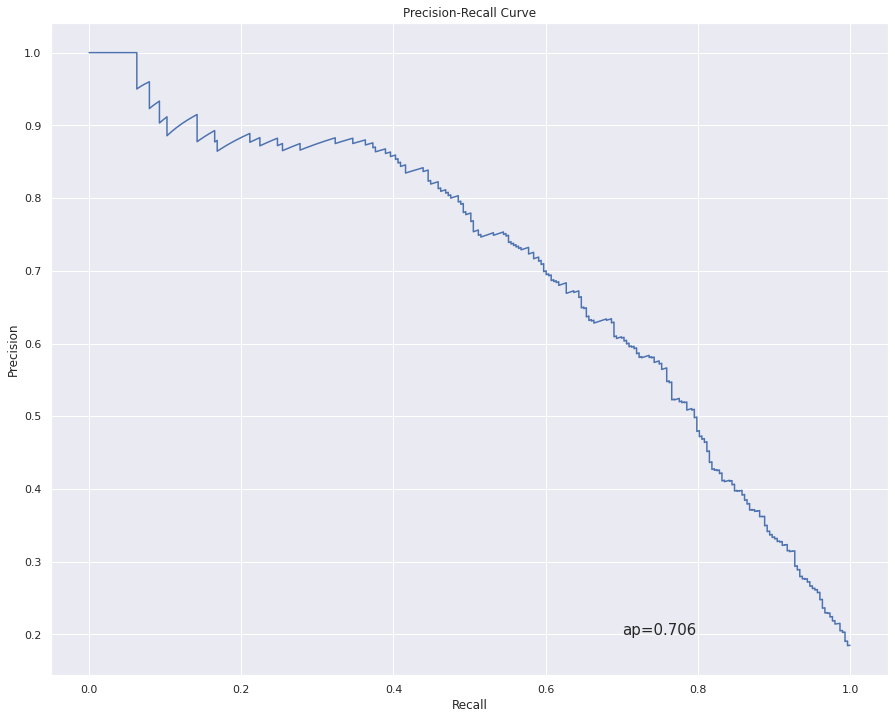

In [122]:
precision_logreg, recall_logreg, thresholds = precision_recall_curve(y_test, y_pred_proba_logreg_org)

ap_logreg=np.round(average_precision_score(y_test, y_pred_proba_logreg_org),3)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_logreg, precision_logreg)

ax.text(0.7, 0.2,'ap=' + str(ap_logreg) , fontsize=15) 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve and roc_auc score

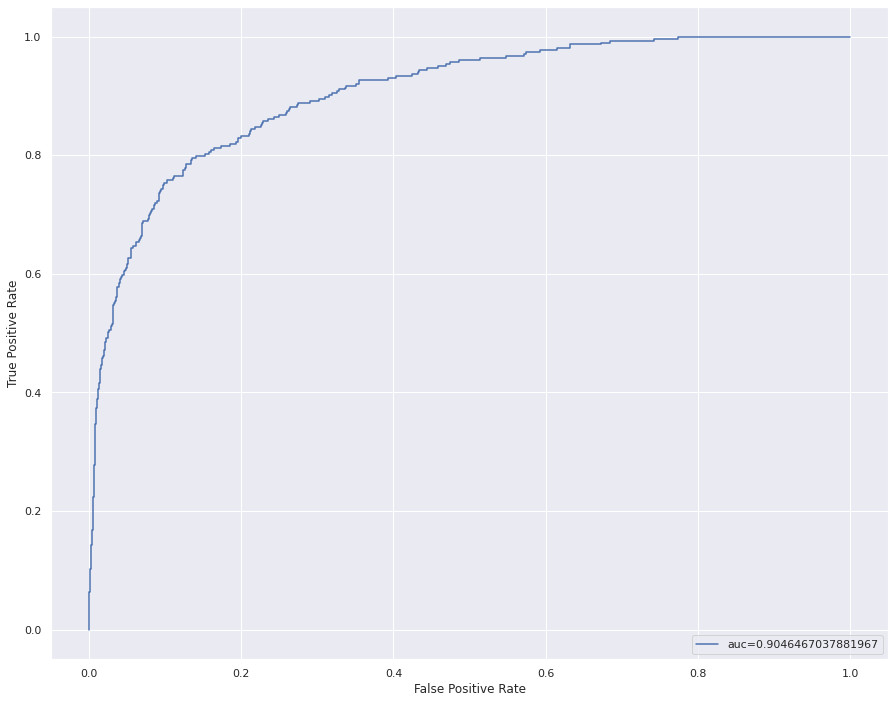

In [123]:
#define metrics
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_proba_logreg_org)
#create ROC curve
auc_logreg = metrics.roc_auc_score(y_test, y_pred_proba_logreg_org)
plt.plot(fpr_logreg,tpr_logreg,label="auc="+str(auc_logreg))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Feature Importance

In [124]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

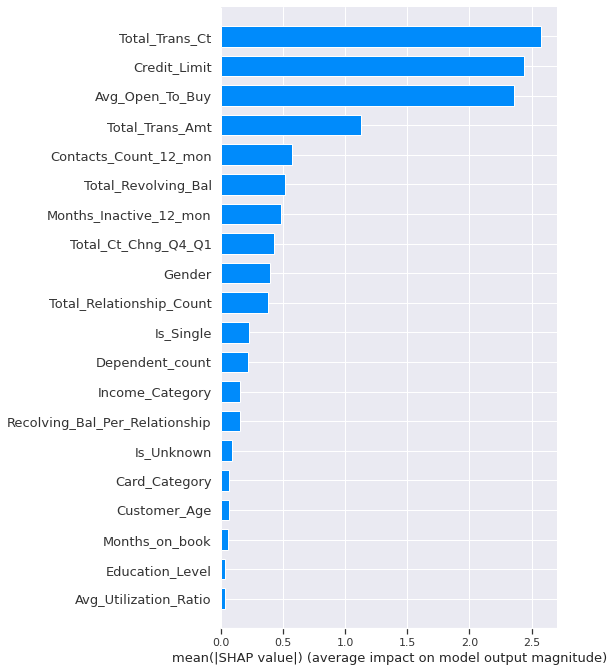

In [125]:
explainer_logreg = shap.LinearExplainer(logreg, X_train_os, feature_dependence="independent")
shap_values_logreg = explainer_logreg.shap_values(X_test)

shap.summary_plot(shap_values_logreg, X_test, plot_type="bar")

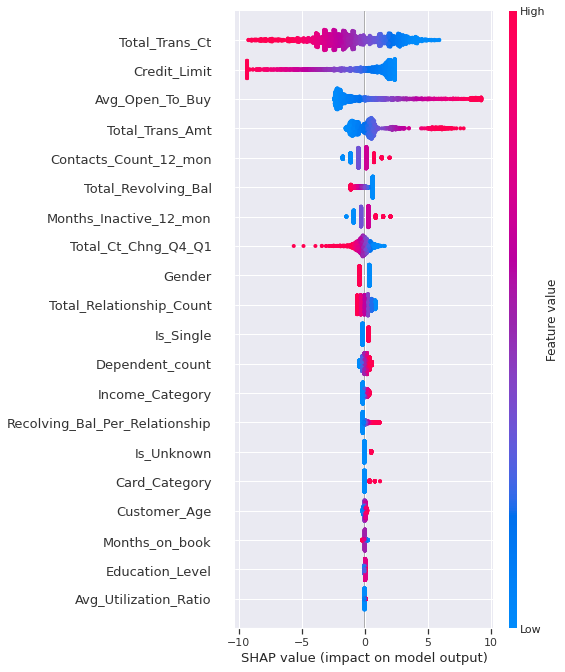

In [126]:
shap.summary_plot(shap_values_logreg, X_test)

## 5-Fold Cross Validation

In [127]:
def myplot(y_actual, y_score,mylabel):
  ap_train=np.round(average_precision_score(y_actual, y_score),3)

  precision, recall, thresholds = precision_recall_curve(y_actual, y_score)

  #create precision recall curve
  #fig, ax = plt.subplots()
  ax=sns.lineplot(recall, precision,label=mylabel)

  #ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 
  #add axis labels to plot
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  #plt.show()

In [128]:

def my_aucplot(y_actual, y_score,mylabel):
#define metrics
  roc_auc = metrics.roc_auc_score(y_test, y_score)
  
  fpr, tpr, _ = metrics.roc_curve(y_actual,  y_score)
#create ROC curve
  
  
  ax_roc=sns.lineplot(fpr,tpr,label=mylabel)

  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  


  
 

,ap_train,ap_test
0,0.9270,0.7080
1,0.9100,0.7540
2,0.9220,0.7540
3,0.9230,0.7240
4,0.9220,0.6990
Average,0.9208,0.7278


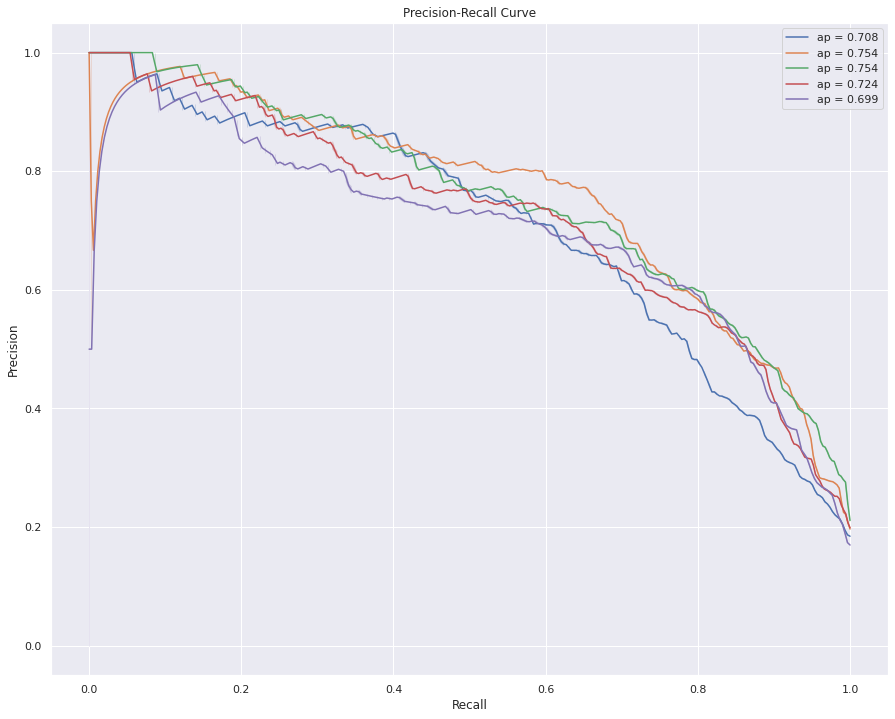

In [129]:
ap_train_list_logreg=[]
ap_test_list_logreg=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")

  logreg.fit(X_train_os, y_train_os)

  y_pred=logreg.predict(X_test)

  y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

  y_pred_proba_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_logreg_train),3)
  ap_train_list_logreg.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_logreg),3)
  ap_test_list_logreg.append(ap_test)

  myplot(y_test, y_pred_proba_logreg,"ap = " +str(ap_test))

  
  

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_logreg,"ap_test":ap_test_list_logreg})

avg_list = [rfc_ap_df['ap_train'].mean(), rfc_ap_df['ap_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list


rfc_ap_df.head(7)

,roc_train,roc_test
0,0.9290,0.9030
1,0.9240,0.9280
2,0.9220,0.9260
3,0.9280,0.9060
4,0.9280,0.9250
Average,0.9262,0.9176


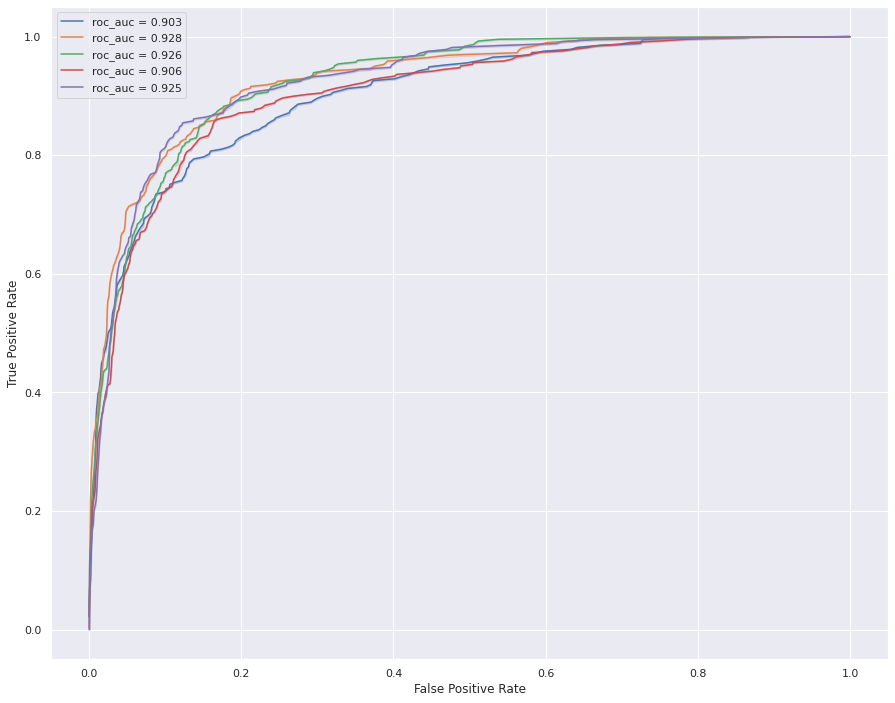

In [130]:
ap_train_list_logreg=[]
ap_test_list_logreg=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")

  logreg.fit(X_train_os, y_train_os)

  y_pred=logreg.predict(X_test)

  y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

  y_pred_proba_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_logreg_train),3)
  ap_train_list_logreg.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_logreg),3)
  ap_test_list_logreg.append(ap_test)

  my_aucplot(y_test, y_pred_proba_logreg,"roc_auc = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"roc_train":ap_train_list_logreg,"roc_test":ap_test_list_logreg})

avg_list = [rfc_ap_df['roc_train'].mean(), rfc_ap_df['roc_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(7)

# Model 2: Random Forest Classfier

## Build Model

In [131]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=6,criterion="entropy")

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train_os,y_train_os)

y_pred=rfc.predict(X_test)

y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

y_pred_proba_rfc_train = rfc.predict_proba(X_train)[:,1]

## Confusion Matrix

In [132]:
rfc_matrix = metrics.confusion_matrix(y_test, y_pred)
rfc_matrix

array([[1614,  113],
       [  24,  275]])

## Classification Report

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1727
           1       0.71      0.92      0.80       299

    accuracy                           0.93      2026
   macro avg       0.85      0.93      0.88      2026
weighted avg       0.94      0.93      0.94      2026



## Precision Recall Curve

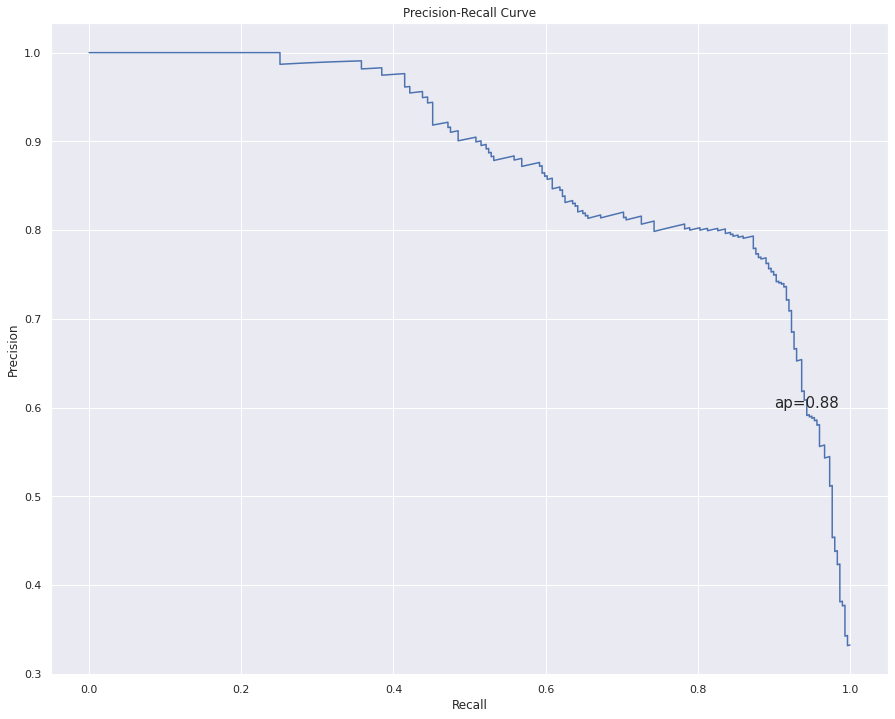

In [134]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall

ap_rfc=np.round(average_precision_score(y_test, y_pred_proba_rfc),3)

precision_rfc, recall_rfc, thresholds = precision_recall_curve(y_test, y_pred_proba_rfc)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_rfc, precision_rfc)
ax.text(0.9, 0.6,'ap=' + str(ap_rfc) , fontsize=15) 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve

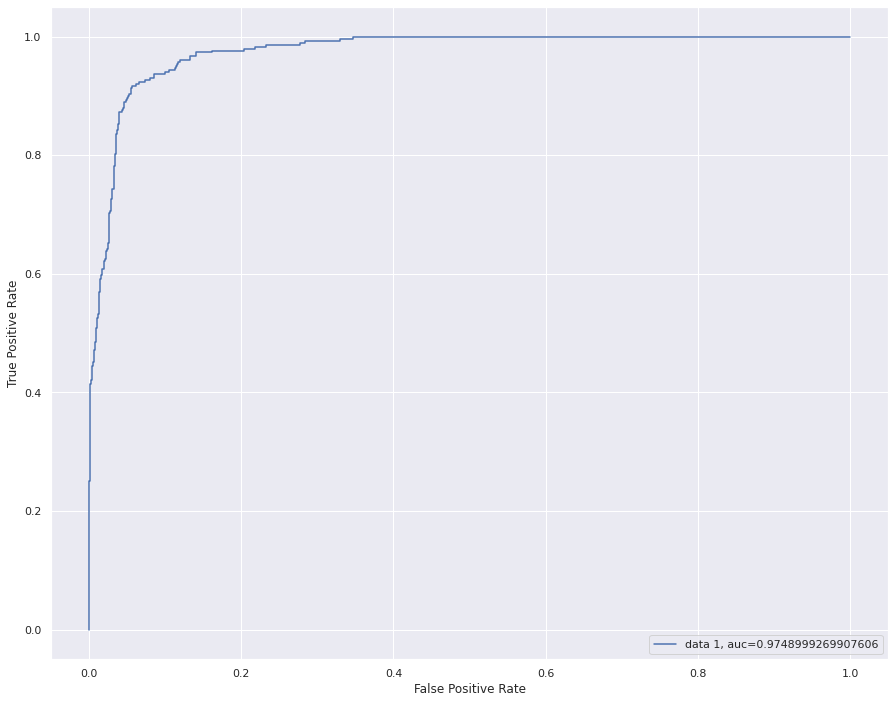

In [135]:
#define metrics

fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
#create ROC curve
auc_rfc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)
plt.plot(fpr_rfc,tpr_rfc,label="data 1, auc="+str(auc_rfc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Feature Importance

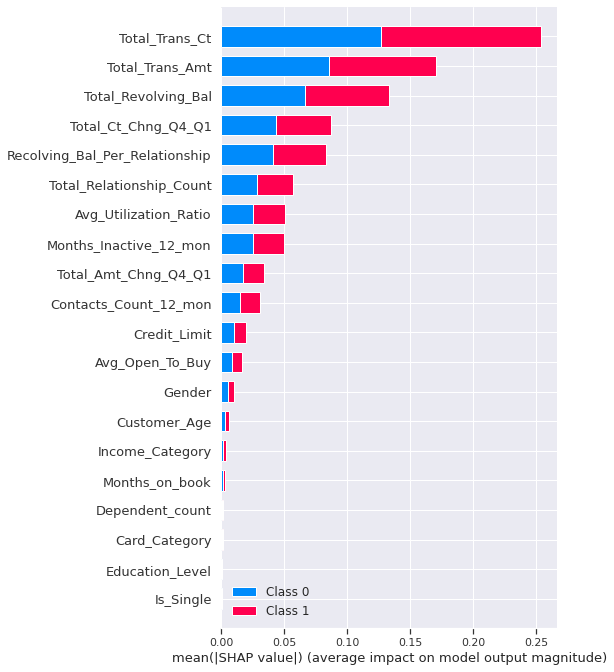

In [136]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test)
shap.summary_plot(shap_values_rfc, X_test, plot_type="bar")

## 5-Fold cross validation

,ap_train,ap_test
0,0.9810,0.8520
1,0.9780,0.8860
2,0.9810,0.8760
3,0.9810,0.8700
4,0.9800,0.8830
Average,0.9802,0.8734


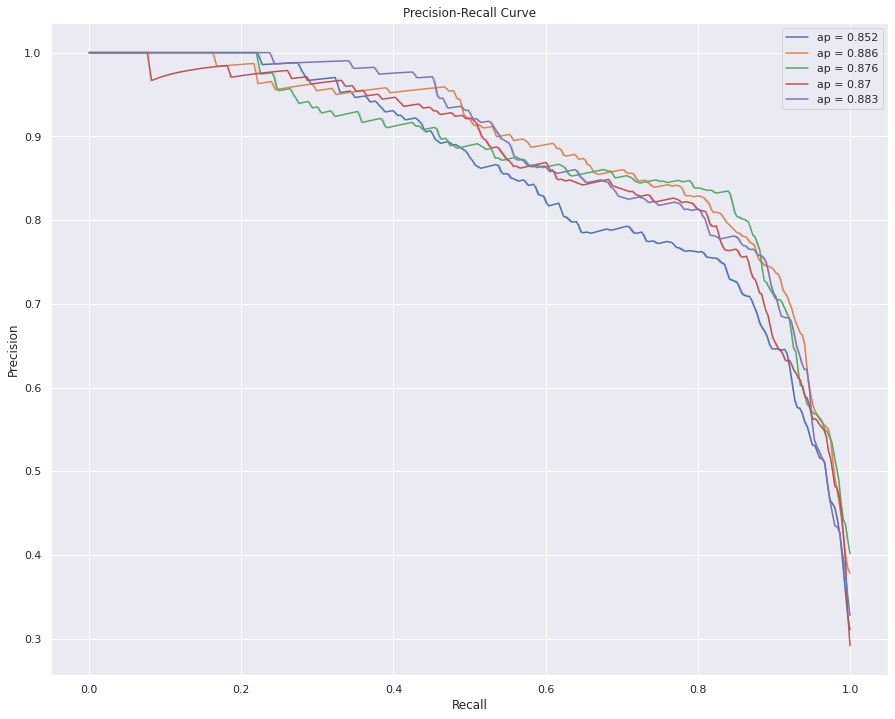

In [137]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  rfc=RandomForestClassifier(n_estimators=100,max_depth=6,criterion="entropy")

  rfc.fit(X_train_os,y_train_os)


  y_pred=rfc.predict(X_test)

  y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]

  y_pred_proba_rfc_train = rfc.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_rfc_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_rfc),3)
  ap_test_list_xgb.append(ap_test)

  myplot(y_test, y_pred_proba_rfc,"ap = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})

avg_list = [rfc_ap_df['ap_train'].mean(), rfc_ap_df['ap_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(6)

,roc_train,roc_test
0,0.982,0.9670
1,0.981,0.9750
2,0.983,0.9720
3,0.985,0.9690
4,0.984,0.9780
Average,0.983,0.9722


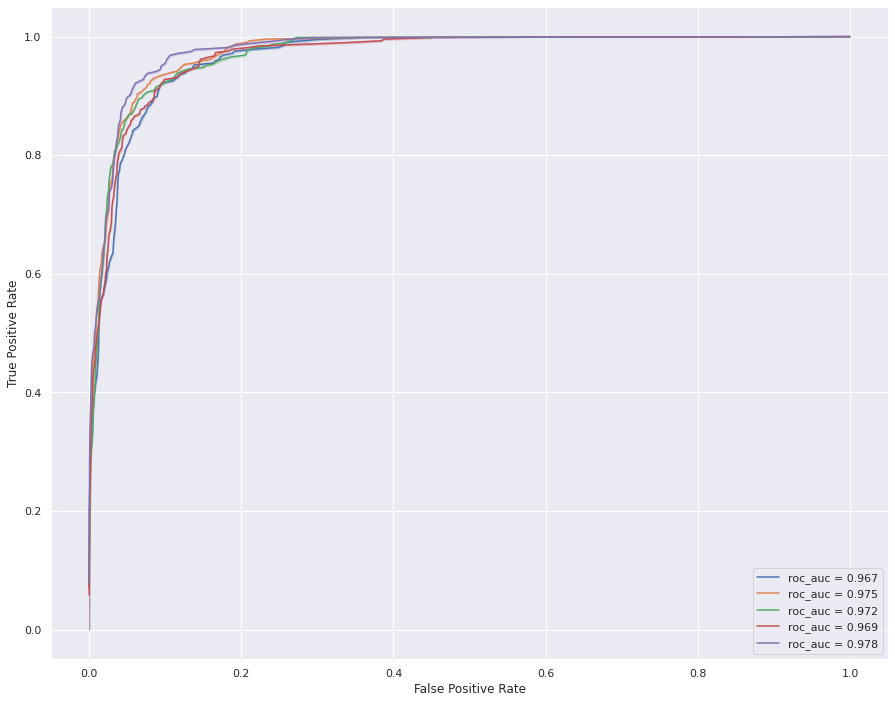

In [138]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  rfc=RandomForestClassifier(n_estimators=100,max_depth=6,criterion="entropy")

  rfc.fit(X_train_os,y_train_os)


  y_pred=rfc.predict(X_test)

  y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]

  y_pred_proba_rfc_train = rfc.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_rfc_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_rfc),3)
  ap_test_list_xgb.append(ap_test)

  my_aucplot(y_test, y_pred_proba_rfc,"roc_auc = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"roc_train":ap_train_list_xgb,"roc_test":ap_test_list_xgb})

avg_list = [rfc_ap_df['roc_train'].mean(), rfc_ap_df['roc_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list


rfc_ap_df.head(6)

# Model 3: XG Boost

## Build Model

In [139]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth=3,learning_rate=0.03,n_estimators=100)

XGB.fit(X_train_os,y_train_os)

y_pred=XGB.predict(X_test)

y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

y_pred_proba_XGB_train = XGB.predict_proba(X_train)[:, 1]


## Confusion Matrix

In [140]:
XGB_matrix = metrics.confusion_matrix(y_test, y_pred)
XGB_matrix

array([[1594,  133],
       [  23,  276]])

## classication report

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1727
           1       0.67      0.92      0.78       299

    accuracy                           0.92      2026
   macro avg       0.83      0.92      0.87      2026
weighted avg       0.94      0.92      0.93      2026



In [142]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9230009871668312


In [143]:
average_precision_score(y_test, y_pred_proba_XGB)

0.9066980246587661

In [144]:
metrics.roc_auc_score(y_test, y_pred_proba_XGB)

0.9787401742538824

## Precision-Recall Curve

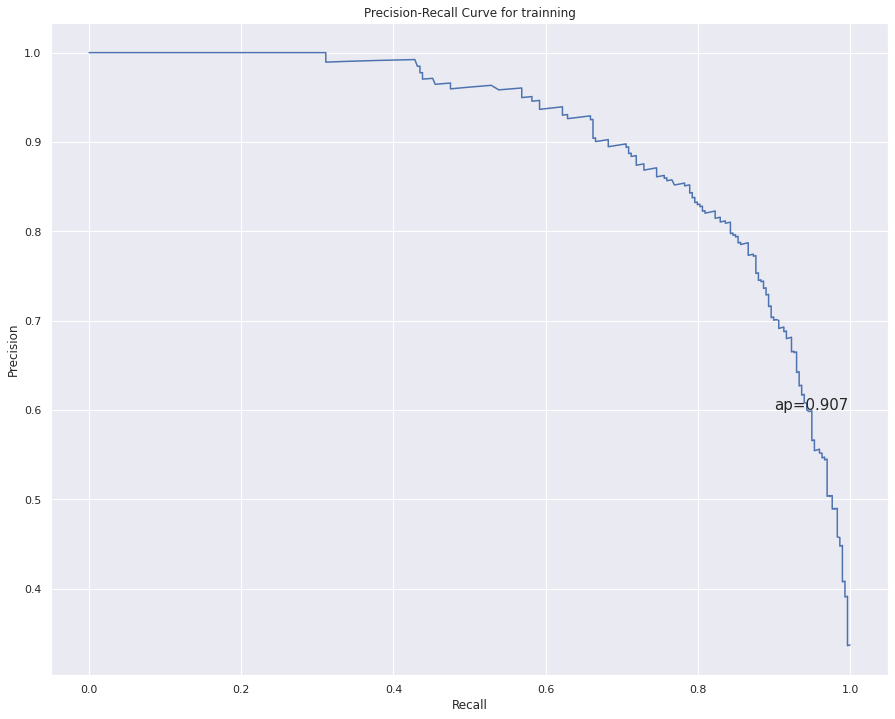

In [145]:
ap_xgb=np.round(average_precision_score(y_test, y_pred_proba_XGB),3)
#calculate precision and recall
precision_xgb, recall_xgb, thresholds = precision_recall_curve(y_test,  y_pred_proba_XGB)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_xgb, precision_xgb)

#add axis labels to plot
ax.set_title('Precision-Recall Curve for trainning')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.text(0.9, 0.6,'ap=' + str(ap_xgb) , fontsize=15) 



#display plot
plt.show()

## ROC-AUC curve

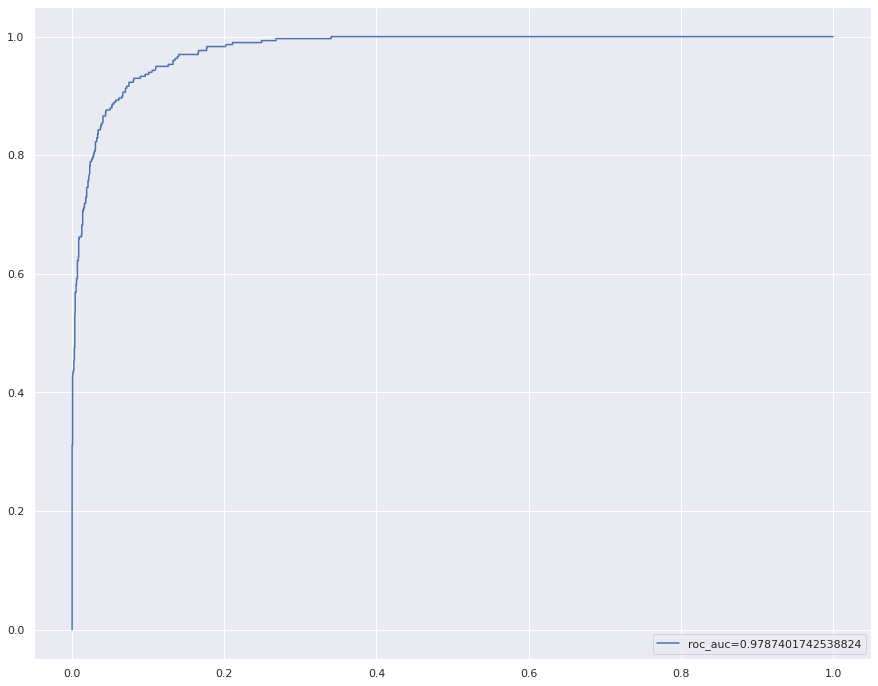

In [146]:
#define metrics
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB)
#create ROC curve
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_XGB)
plt.plot(fpr_xgb,tpr_xgb,label="roc_auc="+str(auc_xgb))
plt.legend(loc=4)
plt.show()

## Feature Importance

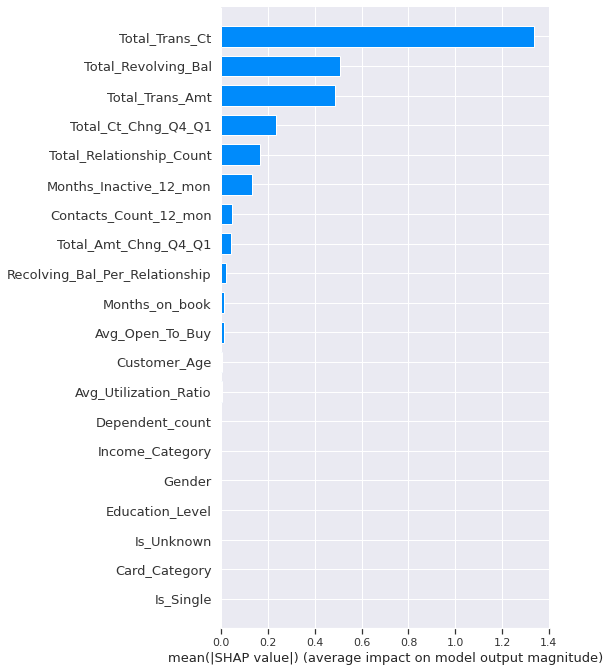

In [147]:
explainer_xgb = shap.TreeExplainer(XGB)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

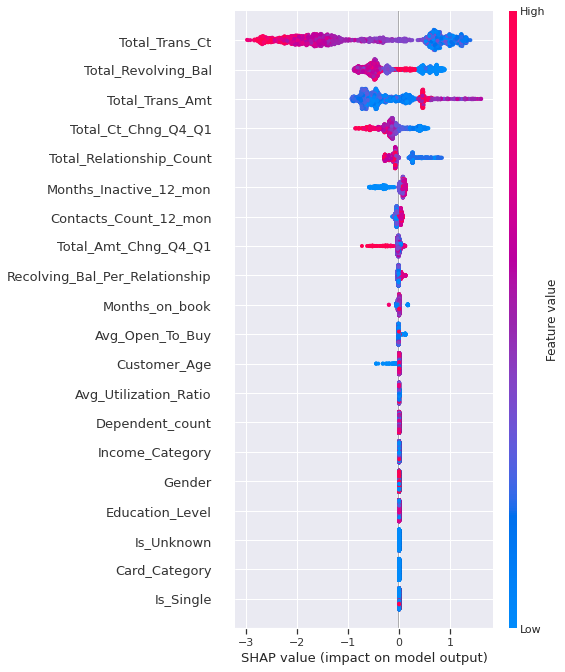

In [148]:
shap.summary_plot(shap_values_xgb, X_test)

## 5-Fold cross validation

,ap_train,ap_test
0,0.988,0.916
1,0.988,0.945
2,0.988,0.932
3,0.990,0.923
4,0.986,0.924
Average,0.988,0.928


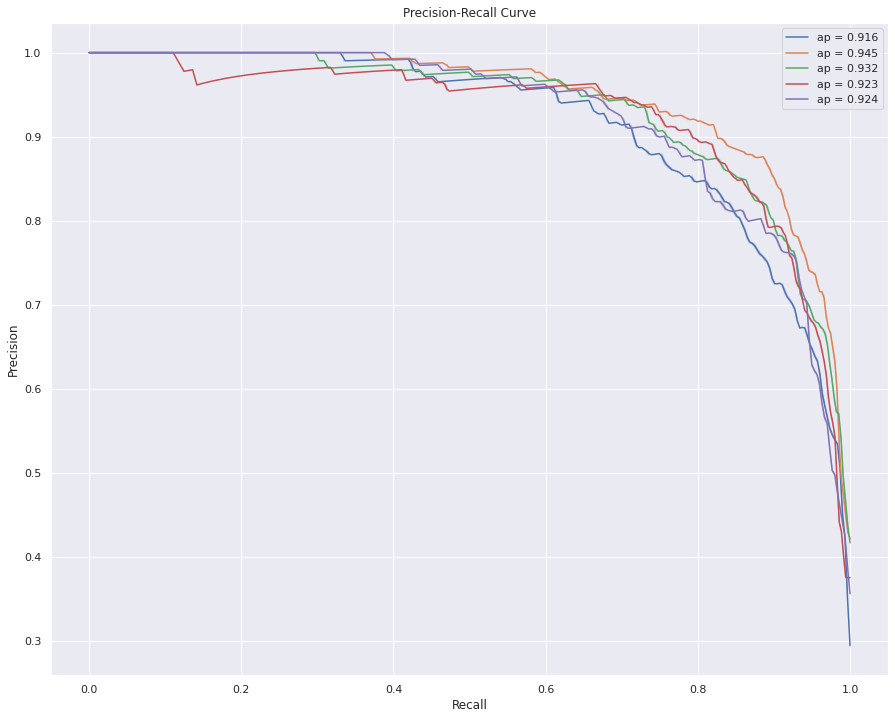

In [149]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  XGB = XGBClassifier(max_depth=3,learning_rate=0.03,n_estimators=150)

  XGB.fit(X_train_os,y_train_os)

  y_pred=XGB.predict(X_test)

  y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

  y_pred_proba_XGB_train = XGB.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_XGB_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_XGB),3)
  ap_test_list_xgb.append(ap_test)

  myplot(y_test, y_pred_proba_XGB,"ap = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})

# Create a list of the average precision values
avg_list = [rfc_ap_df['ap_train'].mean(), rfc_ap_df['ap_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(6)

,roc_train,roc_test
0,0.9830,0.9750
1,0.9830,0.9800
2,0.9830,0.9790
3,0.9850,0.9750
4,0.9830,0.9770
Average,0.9834,0.9772


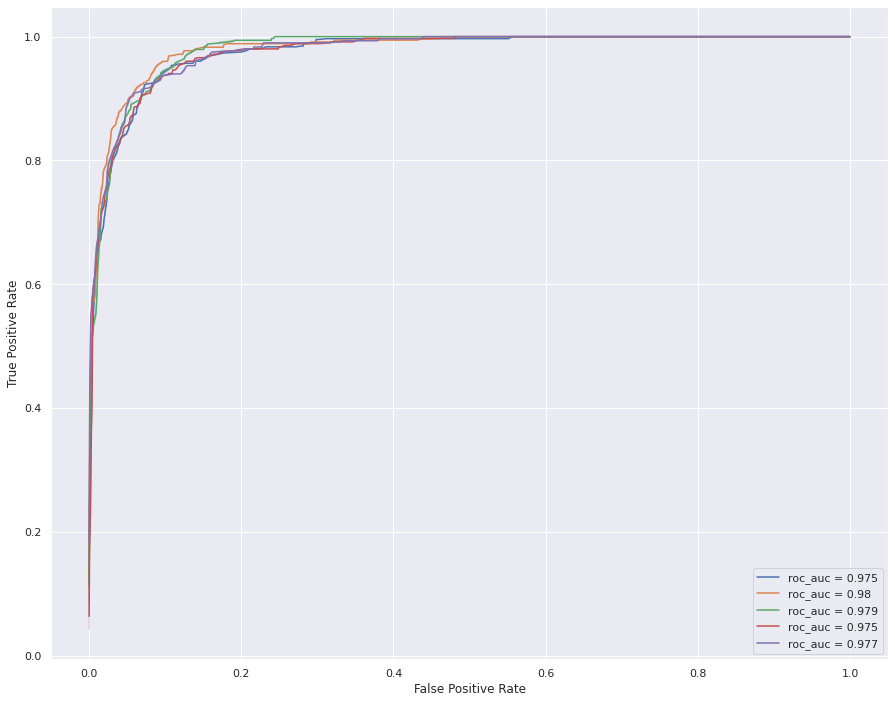

In [150]:
roc_train_xgb=[]
roc_test_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  XGB = XGBClassifier(max_depth=3,learning_rate=0.03,n_estimators=100)

  XGB.fit(X_train_os,y_train_os)

  y_pred=XGB.predict(X_test)

  y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

  y_pred_proba_XGB_train = XGB.predict_proba(X_train_os)[:, 1]

  roc_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_XGB_train),3)
  roc_train_xgb.append(roc_train)
  
  roc_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_XGB),3)
  roc_test_xgb.append(roc_test)

  my_aucplot(y_test, y_pred_proba_XGB,"roc_auc = " +str(roc_test))

rfc_ap_df=pd.DataFrame({"roc_train":roc_train_xgb,"roc_test":roc_test_xgb})

avg_list = [rfc_ap_df['roc_train'].mean(), rfc_ap_df['roc_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(20)

# Conclusion

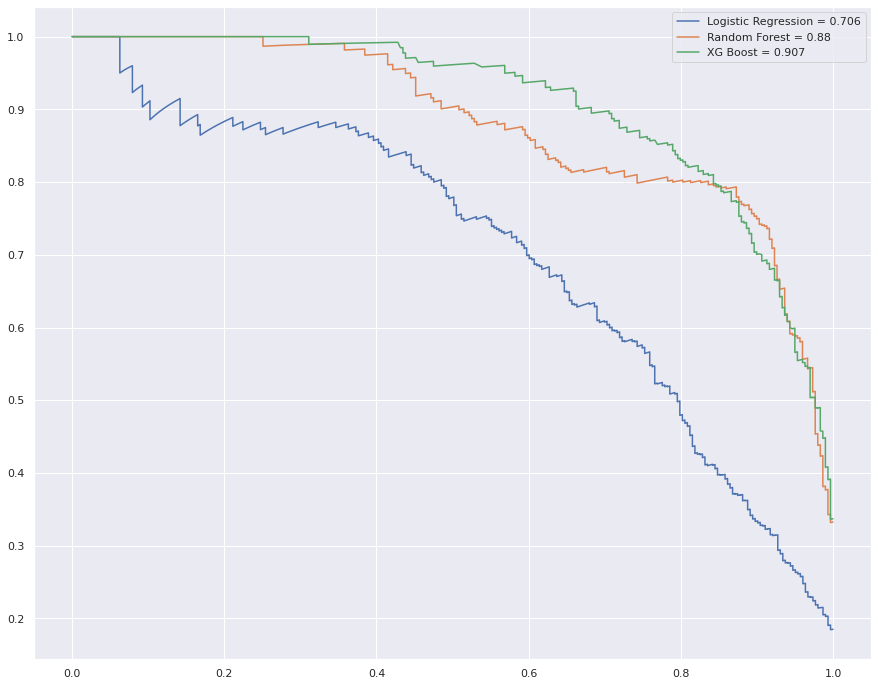

In [151]:
plt.plot(recall_logreg, precision_logreg, label="Logistic Regression = "+str(ap_logreg))

# Plot the second precision-recall curve
plt.plot(recall_rfc, precision_rfc, label="Random Forest = "+str(ap_rfc))

# Plot the third precision-recall curve
plt.plot(recall_xgb, precision_xgb, label="XG Boost = "+str(ap_xgb))

# Add a legend to the graph
plt.legend()

# Show the plot
plt.show()

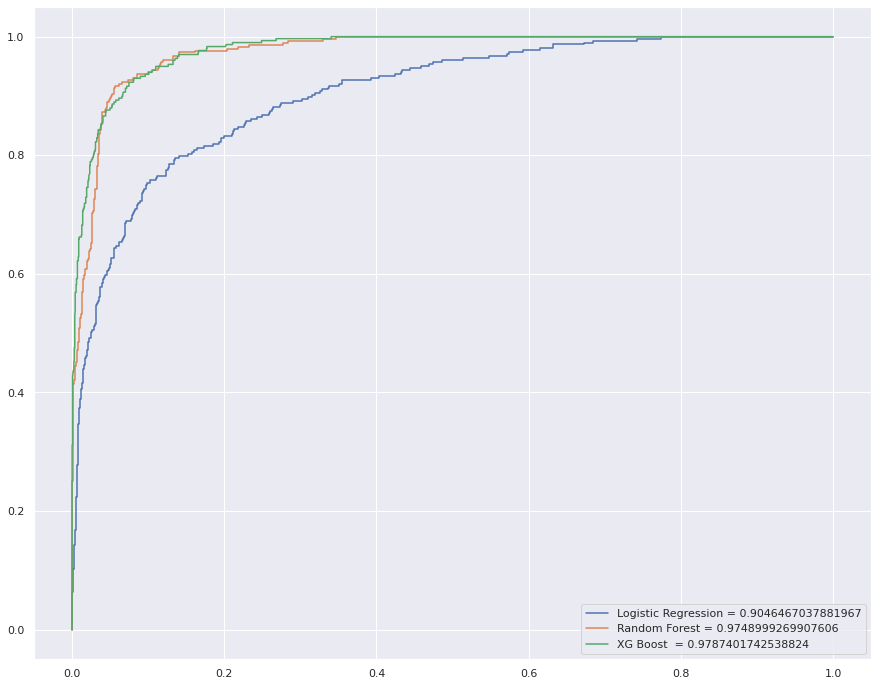

In [152]:
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression = "+str(auc_logreg))

# Plot the second ROC AUC curve
plt.plot(fpr_rfc, tpr_rfc, label="Random Forest = "+str(auc_rfc))

# Plot the third ROC AUC curve
plt.plot(fpr_xgb, tpr_xgb, label="XG Boost  = "+str(auc_xgb))

# Add a legend to the graph
plt.legend()

# Show the plot
plt.show()

# Pickling the model

### Random Forest

In [153]:
X_pk = df1[["Total_Trans_Ct","Total_Trans_Amt","Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1","Months_Inactive_12_mon"]] # Features
y = df1["Attrition_Flag"] 

In [154]:
import pickle

Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_pk, y, test_size=0.2, random_state=321)

ros = RandomOverSampler(sampling_strategy=1) 
Xd_res_os, yd_res_os = ros.fit_resample(Xd_train, yd_train)

Xd_train_os, Xd_test_os, yd_train_os, yd_test_os = train_test_split(Xd_res_os, yd_res_os, test_size=0.2, random_state=357)
  
rfc_pk = RandomForestClassifier(max_depth=7)

rfc_pk.fit(Xd_train_os, yd_train_os)

y_pred_proba_rfc_pk = rfc_pk.predict_proba(Xd_test)[:,1]


In [155]:
metrics.roc_auc_score(yd_test, y_pred_proba_rfc_pk)

0.975403634385493

In [156]:
average_precision_score(yd_test, y_pred_proba_rfc_pk)

0.8793693575581986

In [157]:
Xd_test.head()

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon
7337,66,3391,0,0.833,3
2183,79,4107,629,0.580,1
6051,67,4002,1342,0.763,3
2332,38,1334,1960,0.407,4
5931,40,2182,0,0.429,3


In [158]:
rfc_pk.predict(Xd_test)

array([0, 0, 0, ..., 0, 0, 1])

In [159]:
my_features_rfc = pd.DataFrame({'Total_Trans_Ct':[66], 'Total_Trans_Amt':[3391], 'Total_Revolving_Bal': [0],	'Total_Ct_Chng_Q4_Q1':[0.833], 'Months_Inactive_12_mon':[3]})
rfc_pk.predict(my_features_rfc)

array([0])

In [160]:
pickle.dump(rfc_pk,open('rfc.pkl', 'wb'))

### XG Boost

In [161]:
X_pk_xgb = df1[["Total_Trans_Ct","Total_Revolving_Bal","Total_Trans_Amt","Total_Ct_Chng_Q4_Q1","Total_Relationship_Count"]] # Features
y = df1["Attrition_Flag"] 

In [162]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_pk_xgb, y, test_size=0.2, random_state=788)

ros = RandomOverSampler(sampling_strategy=1) 
Xd_res_os, yd_res_os = ros.fit_resample(Xd_train, yd_train)

Xd_train_os, Xd_test_os, yd_train_os, yd_test_os = train_test_split(Xd_res_os, yd_res_os, test_size=0.2, random_state=122)
  
xgb_pk = XGBClassifier(max_depth=3,learning_rate=0.03,objective='binary:logistic')

xgb_pk.fit(Xd_train_os, yd_train_os)

y_pred_proba_xgb_pk = xgb_pk.predict_proba(Xd_test)[:,1]

In [163]:
metrics.roc_auc_score(yd_test, y_pred_proba_xgb_pk)

0.976967419789067

In [164]:
average_precision_score(yd_test, y_pred_proba_xgb_pk)

0.9003469478700502

In [165]:
xgb_pk.predict_proba(Xd_test)

array([[0.9566903 , 0.04330969],
       [0.81567657, 0.18432346],
       [0.08989942, 0.9101006 ],
       ...,
       [0.54600513, 0.45399484],
       [0.9599459 , 0.04005408],
       [0.8541488 , 0.14585118]], dtype=float32)

In [166]:
xgb_pk.predict(Xd_test)

array([0, 0, 1, ..., 0, 0, 0])

In [167]:
Xd_test.tail()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count
5738,50,0,2451,0.667,5
5796,77,2517,4960,0.750,5
1351,21,1151,820,0.750,3
7400,82,1276,4613,0.745,6
4574,63,1302,3785,0.750,5


In [168]:
my_features = pd.DataFrame({'Total_Trans_Ct':[21], 'Total_Revolving_Bal':[1151], 'Total_Trans_Amt': [820],	'Total_Ct_Chng_Q4_Q1':[0.750], 'Total_Relationship_Count':[3]})
xgb_pk.predict(my_features)

array([0])

# Dollar Value Evaluation

1- Focusing on your test data only (unseen data), compute the total credit limits of the customers whom your model could correctly predict their churn in the future

2.a- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model could correctly predict their churn in the future (predicted to be 1 and actually 1)

2.b- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model cannot correctly predict their churn in the future (predicted to be 0 but actually 1) (edited) 






In [169]:
X_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
3698,61,1,0,4.0,1.0,1,42,4,3,2,...,15939.0,0.791,3982,68,0.943,0.000,0.000000,0,1,0
1630,35,0,2,2.0,1.0,0,29,6,1,3,...,9254.0,0.856,1830,36,0.636,0.157,287.666667,1,0,0
1978,38,0,1,3.0,1.0,0,20,5,1,3,...,2636.0,1.488,3095,63,0.969,0.488,503.400000,1,0,0
9592,32,0,0,1.0,0.0,0,21,2,3,1,...,1956.0,0.628,15574,115,0.797,0.540,1147.500000,0,1,0
9136,34,1,1,3.0,3.0,0,22,1,2,2,...,2298.0,0.175,3922,51,0.645,0.381,1413.000000,0,1,0


In [170]:
combine_df=pd.DataFrame({"Y_actual":y_test,"Y_proba":y_pred_proba_XGB,"Dollar_Overall_Trx":X_test["Total_Trans_Amt"]})

In [171]:
combine_df.head()

,Y_actual,Y_proba,Dollar_Overall_Trx
3698,0,0.099620,3982
1630,0,0.199525,1830
1978,0,0.196518,3095
9592,0,0.069758,15574
9136,1,0.779965,3922


In [172]:
for i in range(1,10):
  step=i/10
  col_name="Y_predict_"+str(step)
  combine_df[col_name]=1*(combine_df['Y_proba']>step)

In [173]:
combine_df.head()

,Y_actual,Y_proba,Dollar_Overall_Trx,Y_predict_0.1,Y_predict_0.2,Y_predict_0.3,Y_predict_0.4,Y_predict_0.5,Y_predict_0.6,Y_predict_0.7,Y_predict_0.8,Y_predict_0.9
3698,0,0.099620,3982,0,0,0,0,0,0,0,0,0
1630,0,0.199525,1830,1,0,0,0,0,0,0,0,0
1978,0,0.196518,3095,1,0,0,0,0,0,0,0,0
9592,0,0.069758,15574,0,0,0,0,0,0,0,0,0
9136,1,0.779965,3922,1,1,1,1,1,1,1,0,0


In [174]:


Dollar_value_11=[]
Dollar_value_01=[]
Dollar_value_10=[]

for i in range(1,10): 
  pred_name="Y_predict_"+str(i/10)
  Dollar_value_11.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_01.append(combine_df.loc[(combine_df['Y_actual']==0) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_10.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==0),'Dollar_Overall_Trx'].sum())



  

In [175]:
thresh=[]
for i in range(1,10):
  thresh.append(i/10)
thresh



[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [176]:
th_df=pd.DataFrame({"threshold":thresh,"Dollar_11":Dollar_value_11,"Dollar_10":Dollar_value_10,"Dollar_01":Dollar_value_01})

In [177]:
th_df

,threshold,Dollar_11,Dollar_10,Dollar_01
0,0.1,896142,0,2746145
1,0.2,886269,9873,1673812
2,0.3,878411,17731,900126
3,0.4,863814,32328,573439
4,0.5,814505,81637,282299
5,0.6,784536,111606,197713
6,0.7,699466,196676,109576
7,0.8,597769,298373,52248
8,0.9,286332,609810,2028


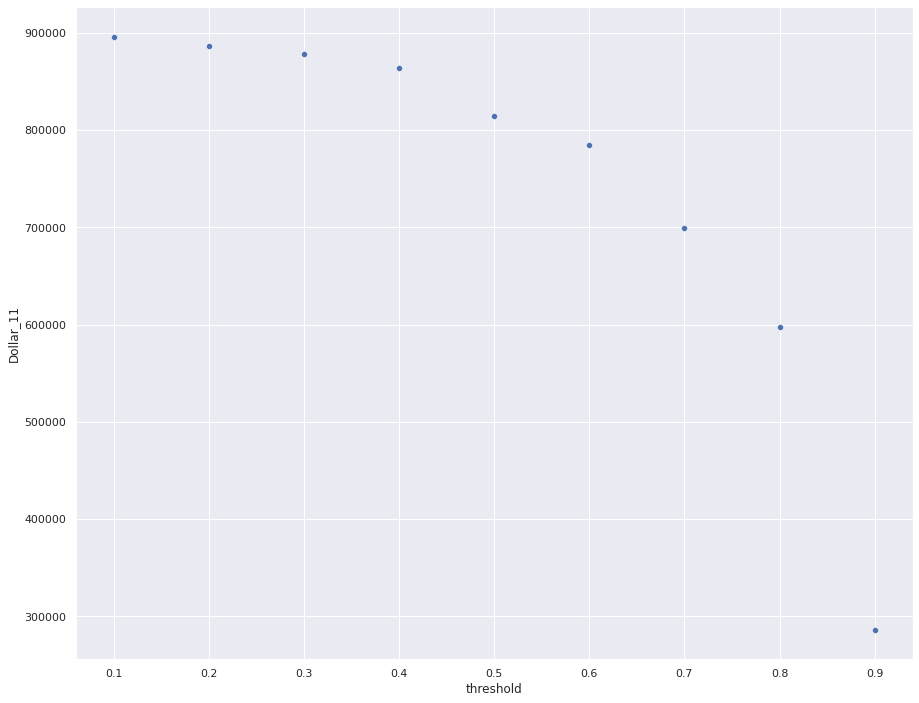

In [178]:
sns.scatterplot(th_df['threshold'],th_df['Dollar_11'])